reading timestamps to filter out ones we are interested in

In [1]:
import pandas as pd

timestamps_data = pd.read_csv("data_csv/timestamps_ext.csv")
timestamps_data.drop(columns=[f"p{i}_championId" for i in range(1, 11)], inplace=True)
target = pd.read_csv("data_csv/first_win.csv")
target.columns = ["matchId", "first_win"]
data = timestamps_data.merge(target, on="matchId")
del target

with open("data_csv/timestamps_ext_columns.txt", "w") as f:
    f.write( "\n".join(timestamps_data.columns))
data_cleaned = data.dropna()
del timestamps_data

In [2]:
timestamps_starting = data_cleaned[data_cleaned["timeStamp"] == 0]
timestamps_20p = data_cleaned.loc[
    data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
        lambda x: (x - 0.2).abs().idxmin()
    )
]
timestamps_40p = data_cleaned.loc[
    data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
        lambda x: (x - 0.4).abs().idxmin()
    )
]
timestamps_60p = data_cleaned.loc[
    data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
        lambda x: (x - 0.6).abs().idxmin()
    )
]
timestamps_80p = data_cleaned.loc[
    data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
        lambda x: (x - 0.8).abs().idxmin()
    )
]
timestamps_100p = data_cleaned.loc[
    data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
        lambda x: (x - 1.0).abs().idxmin()
    )
]


In [3]:
#make data_cleaned only include whats in timestamps_starting .. 100

data_cleaned = pd.concat(
    [timestamps_starting, timestamps_20p, timestamps_40p, timestamps_60p, timestamps_80p, timestamps_100p]
)

loading matches data to filtered timestamps

In [4]:
matches_data = pd.read_csv("data_csv/matches.csv")
with open("data_csv/match_columns.txt","w") as f:
    f.write("\n".join(matches_data.columns))
    
columns = [] 
columns.extend([f"p{i}_teamPosition" for i in range(1, 11)])
columns.extend([f"p{i}_summonerLevel" for i in range(1, 11)])
columns.extend([f"p{i}_summoner1Id" for i in range(1, 11)])
columns.extend([f"p{i}_summoner2Id" for i in range(1, 11)])
columns.extend([f"p{i}_role" for i in range(1, 11)])
columns.extend([f"p{i}_lane" for i in range(1, 11)])
columns.extend([f"p{i}_individualPosition" for i in range(1, 11)])
columns.extend([f"p{i}_championId" for i in range(1, 11)])
columns.extend(["matchId","gameId","gameVersion", "gameCreation","gameStartTimestamp","gameEndTimestamp", "gameDuration" ])


matches_data = matches_data[columns]

print(len(matches_data.columns))
data_cleaned = data_cleaned.merge(matches_data, on="matchId")
print(len(data_cleaned.columns))
#del matches_data
#call garbagecollector 
import gc
gc.collect()

87
551


0

In [5]:
print(len(data_cleaned.columns))

551


In [6]:
data_cleaned.head()

,matchId,timeStamp,p1_currentGold,p2_currentGold,p3_currentGold,p4_currentGold,p5_currentGold,p6_currentGold,p7_currentGold,p8_currentGold,...,p7_championId,p8_championId,p9_championId,p10_championId,gameId,gameVersion,gameCreation,gameStartTimestamp,gameEndTimestamp,gameDuration_y
0,EUW1_6882416210,0,500,500,500,500,500,500,500,500,...,62,7,222,40,6882416210,14.6.570.6276,1712046205448,1712046232712,1712047855825,1623
1,EUW1_6881092720,0,500,500,500,500,500,500,500,500,...,19,136,22,412,6881092720,14.6.570.6276,1711972830768,1711972881130,1711974582700,1701
2,EUW1_6879405717,0,500,500,500,500,500,500,500,500,...,518,55,29,40,6879405717,14.6.570.6276,1711872829956,1711872863863,1711874389709,1525
3,EUW1_6879389461,0,500,500,500,500,500,500,500,500,...,203,38,429,412,6879389461,14.6.570.6276,1711869886553,1711869958422,1711871742154,1783
4,EUW1_6879371828,0,500,500,500,500,500,500,500,500,...,427,103,222,117,6879371828,14.6.570.6276,1711867746200,1711867825588,1711869443849,1618


In [7]:
columns_to_drop = ["gameMode", "gameName", "gameType", "gameVersion", "mapId" ]
data_cleaned.drop(columns=columns_to_drop, inplace=True, errors="ignore")
data_cleaned.drop(columns= ["p{}_summonerId".format(i) for i in range(1, 11)], inplace=True, errors="ignore")
data_cleaned.drop(columns= ["p{}_championName".format(i) for i in range(1, 11)], inplace=True, errors="ignore")

columns_to_drop = ["p{}_win".format(i) for i in range(1, 11)]
data_cleaned.drop(columns=["p{}_win".format(i) for i in range(1,11)], inplace=True, errors="ignore")
data_cleaned.drop(columns=["p{}_nexusLost".format(i) for i in range(1,11)], inplace=True, errors="ignore")
data_cleaned.drop(columns=["p{}_nexusKills".format(i) for i in range(1,11)], inplace=True, errors="ignore")

data_cleaned.drop(columns= ["p{}_summonerName".format(i) for i in range(1, 11)], inplace=True, errors="ignore")
data_cleaned.drop(columns= ["p{}_riotIdTagline".format(i) for i in range(1, 11)], inplace=True, errors="ignore")
data_cleaned.drop(columns= ["tournamentCode"], inplace=True, errors="ignore")
data_cleaned.drop(columns= ["p{}_puuid".format(i) for i in range(1, 11)], inplace=True, errors="ignore")

In [8]:
len(data_cleaned.columns)

550

In [9]:
#reset index
data_cleaned.reset_index(drop=True, inplace=True)
print(data_cleaned.shape)

(145302, 550)


In [10]:
del timestamps_100p
del timestamps_80p
del timestamps_60p
del timestamps_40p
del timestamps_20p
del timestamps_starting
gc.collect()

0

In [11]:
#show how many Na values are in each column and order them by the number of Na values
na_values = data_cleaned.isna().sum().sort_values(ascending=False)
print(na_values)

p8_teamPosition                          18
p5_teamPosition                          12
p1_teamPosition                           6
matchId                                   0
p6_damageStats_magicDamageTaken           0
                                         ..
p6_championStats_bonusMagicPenPercent     0
p5_championStats_bonusMagicPenPercent     0
p4_championStats_bonusMagicPenPercent     0
p3_championStats_bonusMagicPenPercent     0
gameDuration_y                            0
Length: 550, dtype: int64


In [ ]:
import regex as re
others = ['matchId', 'timeStamp', 'percentTimeStamp', "gameDuration"]

blue_team_pattern = re.compile(r'p[1-5]_(.*)')
red_team_pattern = re.compile(r'p(6|7|8|9|10)_(.*)')

blue_team_columns = {}
red_team_columns = {}


cols_to_onehot_encode = []
cols_to_onehot_encode.extend([f"p{i}_teamPosition" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_role" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_lane" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_individualPosition" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_summoner1Id" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_summoner2Id" for i in range(1, 11)])
cols_to_onehot_encode.extend([f"p{i}_championId" for i in range(1, 11)])


for col in data_cleaned.columns:
    if col not in cols_to_onehot_encode:
        if blue_team_pattern.match(col):
            feature_name = blue_team_pattern.match(col).group(1)
            if feature_name not in blue_team_columns:
                blue_team_columns[feature_name] = []
            blue_team_columns[feature_name].append(col)
        elif red_team_pattern.match(col):
            feature_name = red_team_pattern.match(col).group(2)
            if feature_name not in red_team_columns:
                red_team_columns[feature_name] = []
            red_team_columns[feature_name].append(col)

def aggregate_team_columns(data, team_columns, team_prefix):
    for feature, columns in team_columns.items():
        aggregated_column = f'{team_prefix}_{feature}'
        data[aggregated_column] = data[columns].sum(axis=1)
        print(aggregated_column)
    return data

data_cleaned = aggregate_team_columns(data_cleaned, blue_team_columns, 'blue').copy()
data_cleaned = aggregate_team_columns(data_cleaned, red_team_columns, 'red').copy()

champion_id one-hot encoding

In [13]:

print(data_cleaned["p1_role"].value_counts())
print(data_cleaned["p1_lane"].value_counts())

#make onehotencoding for all columns in cols_to_onehot_encode
data_cleaned = pd.get_dummies(data_cleaned, columns=cols_to_onehot_encode)


p1_role
SOLO       79872
NONE       37416
SUPPORT    13836
DUO        12984
CARRY       1194
Name: count, dtype: int64
p1_lane
TOP       84624
JUNGLE    37416
NONE      13380
MIDDLE     9126
BOTTOM      756
Name: count, dtype: int64


In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145302 entries, 0 to 145301
Columns: 2557 entries, matchId to p10_championId_910
dtypes: bool(1984), float64(1), int64(571), object(1)
memory usage: 910.1+ MB


In [15]:
data_cleaned.select_dtypes(include=['object']).columns

Index(['matchId'], dtype='object')

In [16]:
ts_and_id_columns = data_cleaned[['matchId', 'percentTimeStamp', 'timeStamp', 'first_win']].copy()
ts_and_id_columns

,matchId,percentTimeStamp,timeStamp,first_win
0,EUW1_6882416210,0.000000,0,False
1,EUW1_6881092720,0.000000,0,False
2,EUW1_6879405717,0.000000,0,False
3,EUW1_6879389461,0.000000,0,True
4,EUW1_6879371828,0.000000,0,False
...,...,...,...,...
145297,TR1_1507514988,1.000000,34,True
145298,TR1_1507562624,1.000000,32,True
145299,TR1_1507563448,0.980684,22,True
145300,TR1_1507564108,1.000000,28,True


In [17]:
data_cleaned.drop(columns=['matchId', 'percentTimeStamp', 'timeStamp', 'first_win'], inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145302 entries, 0 to 145301
Columns: 2553 entries, p1_currentGold to p10_championId_910
dtypes: bool(1983), int64(570)
memory usage: 906.7 MB


In [18]:
from sklearn.decomposition import PCA

pca = PCA()
data_cleaned_pca = pca.fit_transform(data_cleaned)

In [19]:
pca.explained_variance_[:20]

array([3.76487313e+18, 2.59838039e+18, 1.05443925e+12, 1.74564719e+11,
       8.18383940e+10, 6.39477609e+10, 4.23055135e+10, 3.38074505e+10,
       2.44055875e+10, 2.09730547e+10, 1.28351371e+10, 1.19310206e+10,
       6.84032216e+09, 6.40391315e+09, 6.30183418e+09, 5.14759814e+09,
       4.26143296e+09, 2.48022807e+09, 2.30108368e+09, 1.86988062e+09])

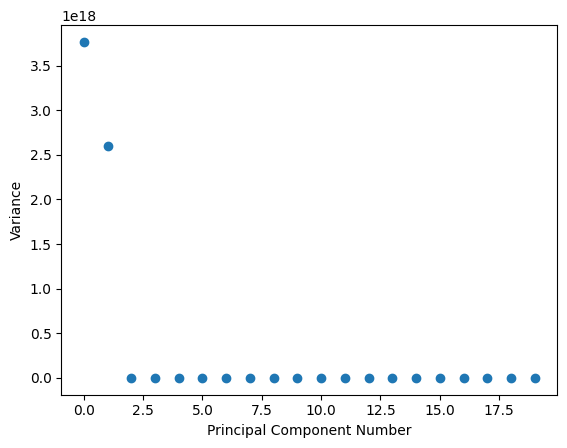

In [20]:
import matplotlib.pyplot as plt

N = 20

plt.scatter(range(N), pca.explained_variance_[:N])
plt.xlabel('Principal Component Number')
plt.ylabel('Variance')
plt.show()

In [21]:
pc1 = pca.components_[0]
cols_list = list(data_cleaned.columns)

[-5.76615305e-01 -5.76615228e-01 -5.76612435e-01 -5.04754271e-02
 -2.88914009e-07 -2.42650708e-07 -2.36695787e-07 -2.17479386e-07
 -1.83838764e-07 -1.76129185e-07  7.47583836e-07  8.45955746e-07
  8.71968349e-07  1.03850155e-06  1.24866144e-06  1.53671333e-06
  1.62664962e-06  2.10309330e-06  4.17057681e-06  6.59795655e-06]


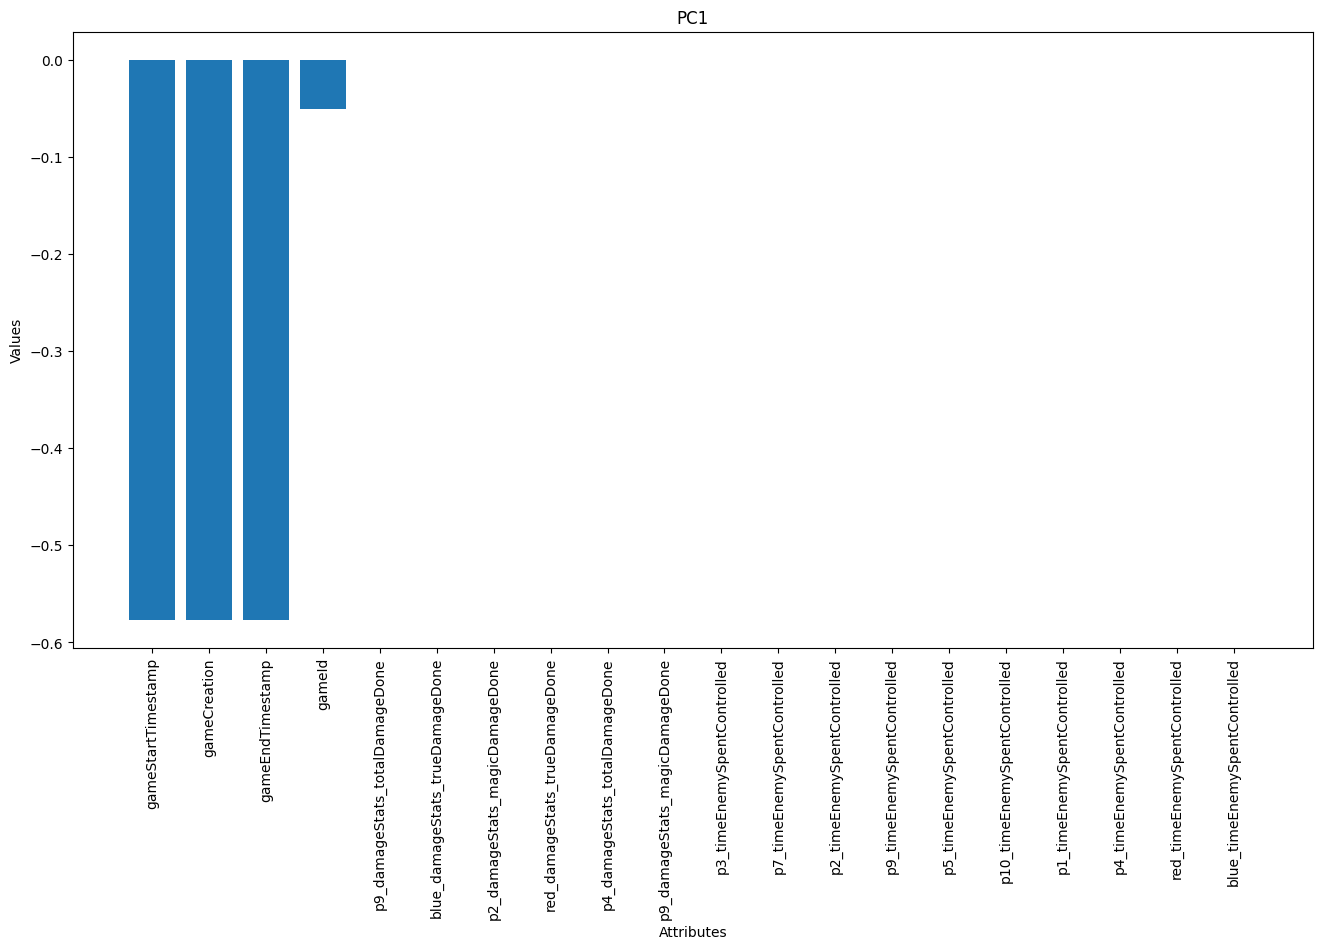

In [22]:
import numpy as np
F = 10

sorted_indices = np.argsort(pc1)
important_indices = list(sorted_indices[:F]) + list(sorted_indices[-F:])
sorted_pc1 = pc1[important_indices]
print(sorted_pc1)
sorted_attributes = [cols_list[i] for i in important_indices]

plt.figure(figsize=(16, 8))
plt.bar(sorted_attributes, sorted_pc1)
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('PC1')
plt.xticks(rotation=90)
plt.show()

[-5.76615305e-01 -5.76615228e-01 -5.76612435e-01 -5.04754271e-02
 -2.88914009e-07 -2.42650708e-07 -2.36695787e-07 -2.17479386e-07
 -1.83838764e-07 -1.76129185e-07  7.47583836e-07  8.45955746e-07
  8.71968349e-07  1.03850155e-06  1.24866144e-06  1.53671333e-06
  1.62664962e-06  2.10309330e-06  4.17057681e-06  6.59795655e-06]


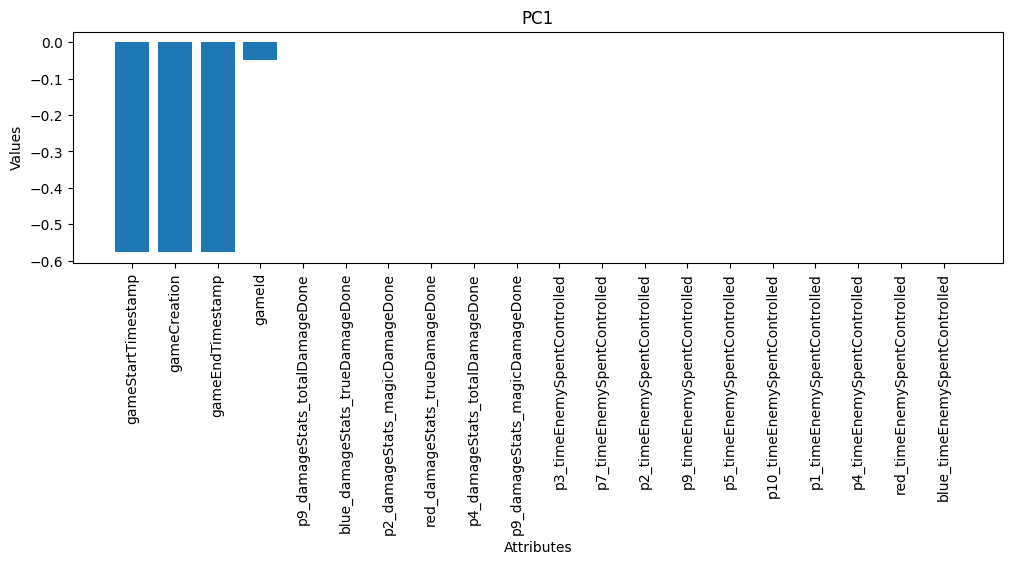

[-9.98725303e-01 -2.14863969e-06 -2.33421025e-07 -1.68582037e-07
 -1.53284725e-07 -5.65875762e-08 -4.31629712e-08 -4.10049480e-08
 -2.12798351e-08 -2.04632921e-08  2.92785257e-06  3.03795814e-06
  3.73472428e-06  3.88476163e-06  4.00631691e-06  4.22069877e-06
  1.01288959e-05  2.91304658e-02  2.91353555e-02  2.91601832e-02]


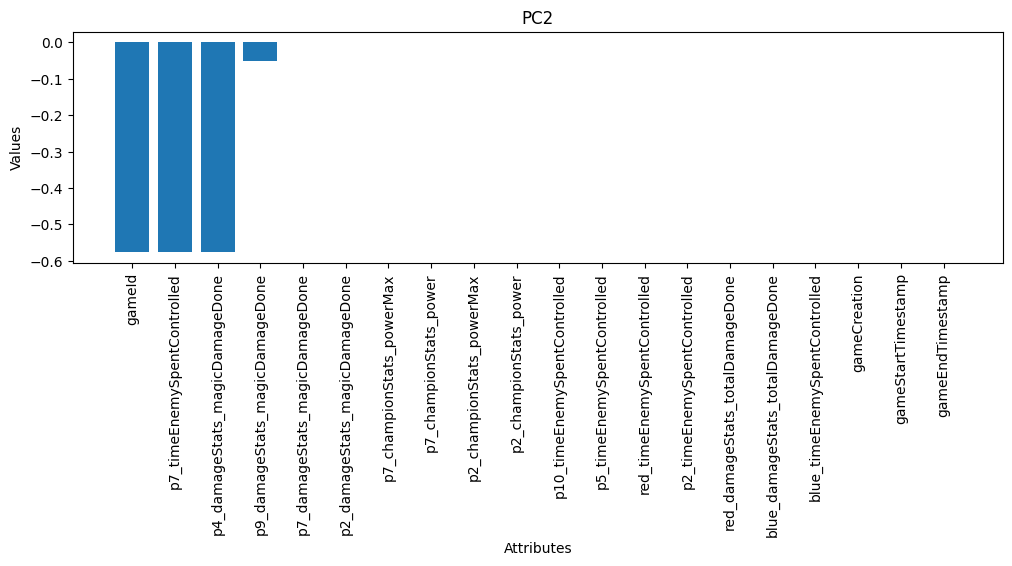

[-3.91446191e-02 -3.90015995e-02 -7.16609794e-07 -2.33620575e-07
 -1.77080165e-07 -5.03435049e-08 -5.03435049e-08 -5.03435049e-08
 -5.03435049e-08 -5.03435049e-08  1.37074401e-01  1.37511350e-01
  1.48410375e-01  1.54113300e-01  1.59736476e-01  1.62376016e-01
  2.54196780e-01  2.56527210e-01  5.43341045e-01  5.59645621e-01]


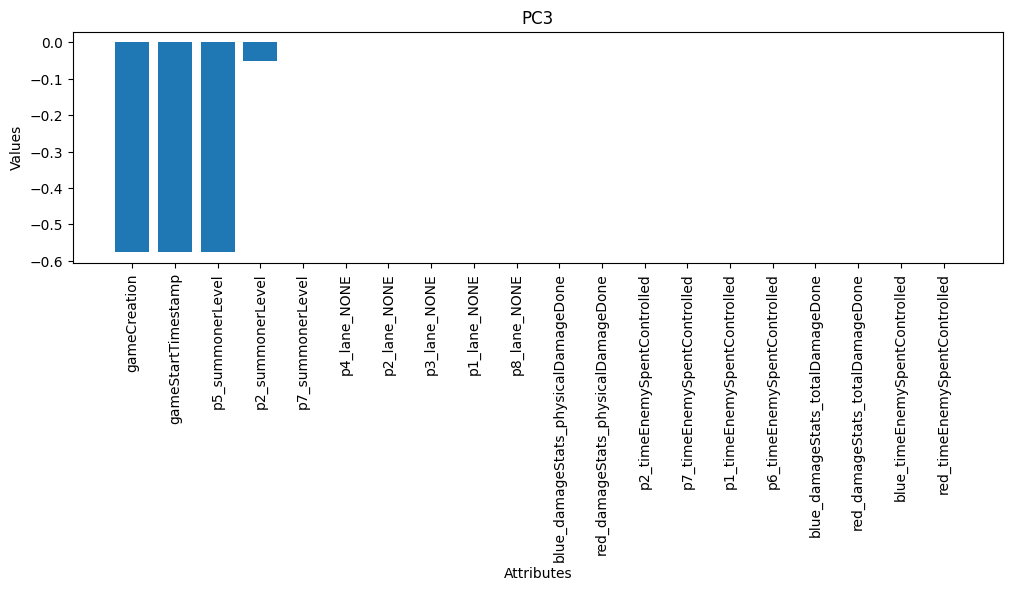

[-0.59957527 -0.34509999 -0.1191566  -0.07277574 -0.0423795  -0.02016345
 -0.01930075 -0.01900919 -0.01521226 -0.01050041  0.00602789  0.00616186
  0.00745641  0.01201428  0.01555833  0.04019929  0.07799978  0.1243562
  0.34063752  0.59875112]


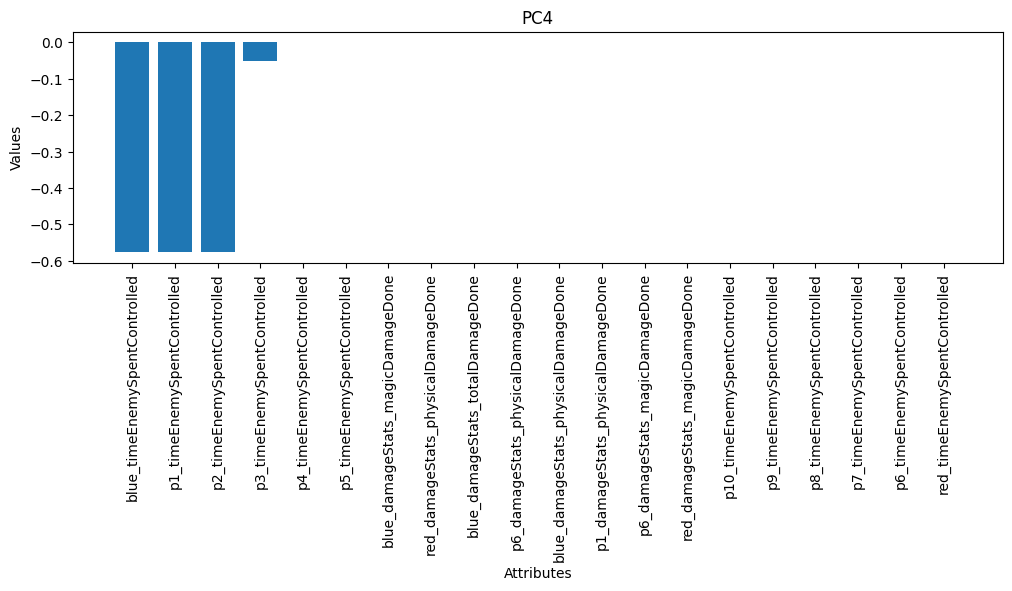

[-7.27521197e-01 -1.45877270e-01 -1.41413345e-01 -8.52210183e-02
 -8.37042575e-02 -4.69910743e-02 -4.45968076e-02 -3.98982425e-02
 -3.91563666e-02 -3.69840993e-02  4.09256255e-05  5.07443062e-05
  6.35361295e-05  9.05608072e-04  1.46590736e-01  1.56587680e-01
  1.90851074e-01  2.08174640e-01  3.59276462e-01  3.68245796e-01]


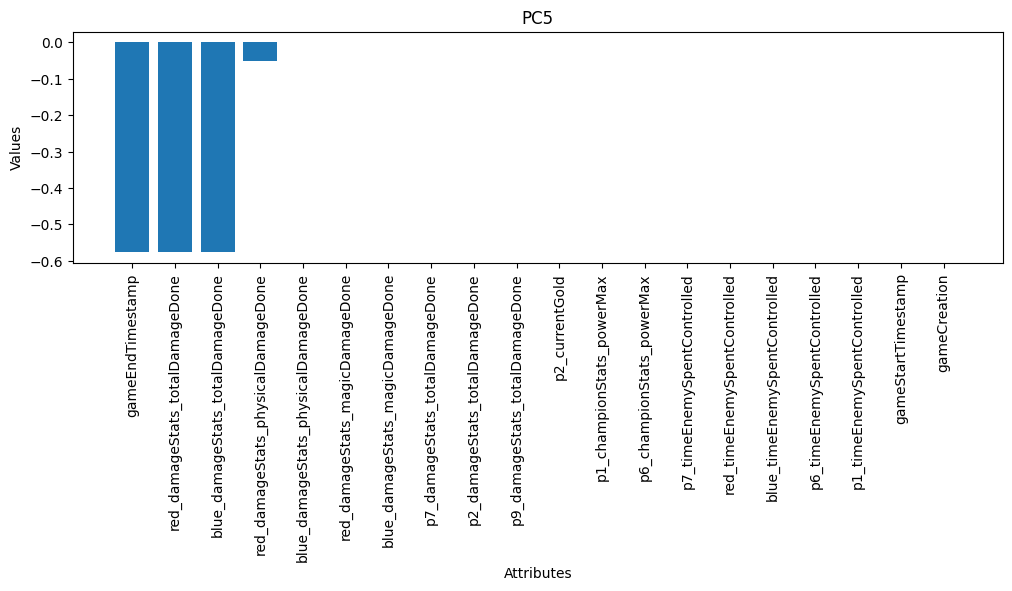

[-2.67090691e-01 -2.64443998e-01 -1.76200220e-01 -1.70769200e-01
 -1.64955604e-01 -1.59263746e-01 -1.56733417e-01 -1.45139392e-01
 -8.58317861e-02 -8.49859758e-02  4.46380743e-05  5.36236543e-05
  5.79909178e-05  5.17725813e-04  5.17725813e-04  1.27173328e-01
  1.31330227e-01  3.46972465e-01  4.53356411e-01  4.86360189e-01]


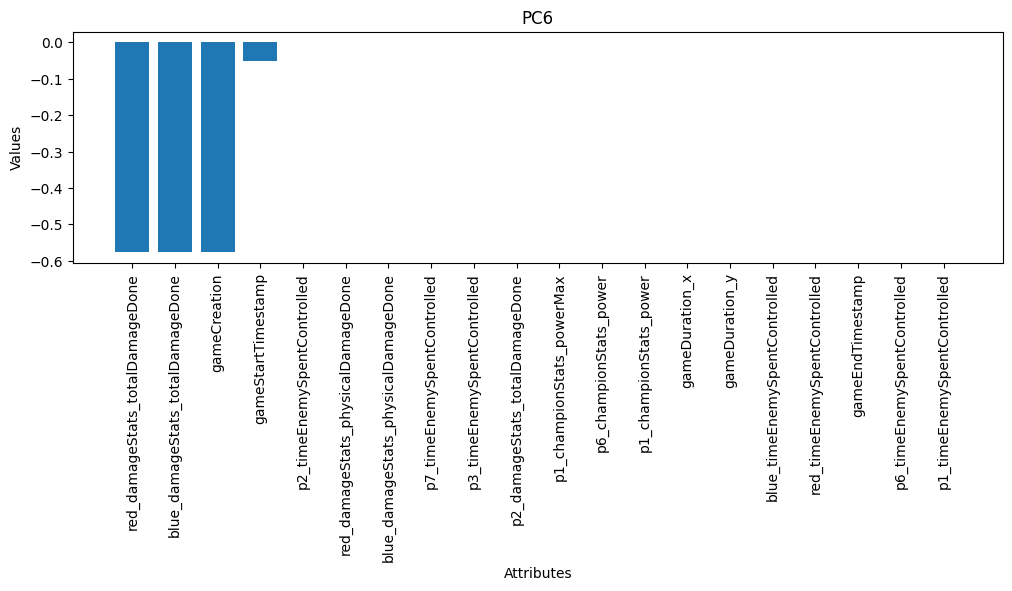

[-0.49214758 -0.44192853 -0.19308615 -0.16691867 -0.06206394 -0.02513979
 -0.01187901 -0.01074747 -0.01036383 -0.00918869  0.02152914  0.02539184
  0.02542351  0.03148443  0.0445575   0.0588028   0.1350291   0.14997349
  0.36658569  0.55318383]


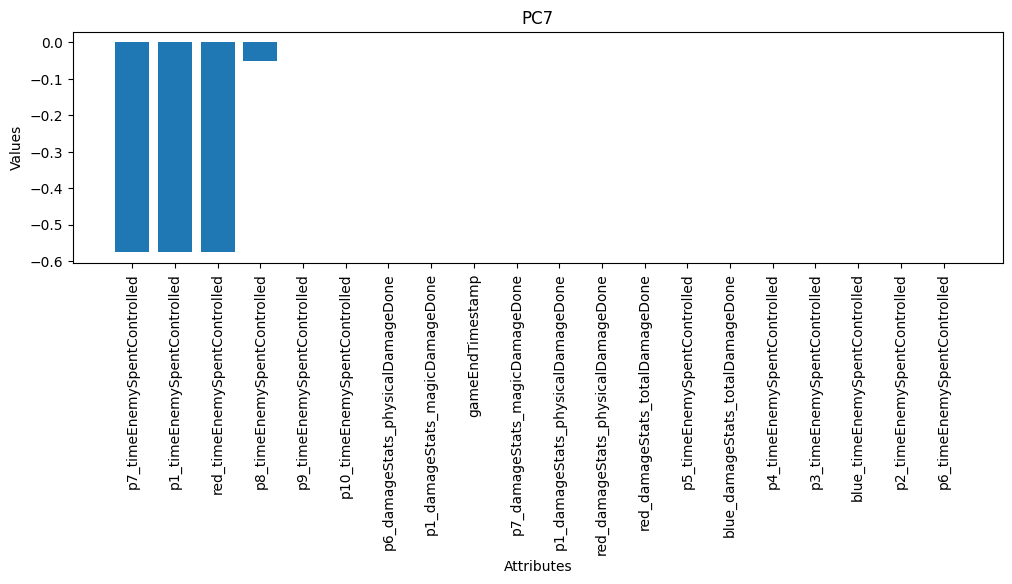

[-3.39298792e-01 -2.95464798e-01 -2.85479933e-01 -2.02010852e-01
 -1.88419975e-01 -1.85467229e-01 -8.58076738e-02 -8.24856194e-02
 -8.20434837e-02 -7.63126715e-02  1.50956931e-04  1.50956931e-04
  1.25343149e-02  2.30999670e-02  8.88497971e-02  1.01566765e-01
  1.61096492e-01  2.33181814e-01  3.97255919e-01  4.98650416e-01]


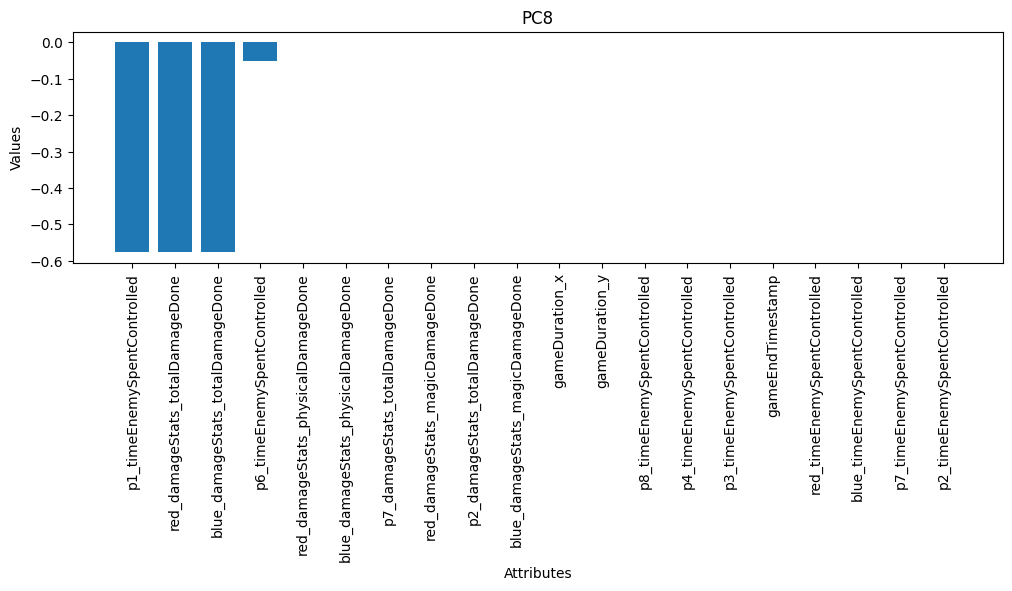

[-0.5183323  -0.20938296 -0.18227694 -0.06261375 -0.057008   -0.0447251
 -0.04210707 -0.03665731 -0.03130367 -0.02958106  0.00731508  0.00765802
  0.01723377  0.02720544  0.03227386  0.04084668  0.08551896  0.13810826
  0.19305424  0.75309911]


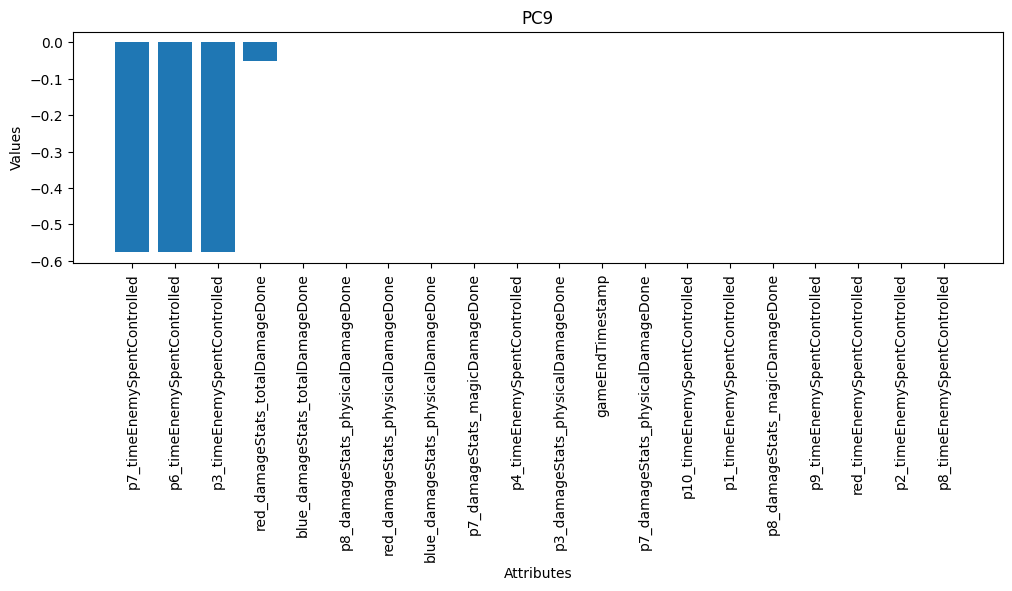

[-0.51149887 -0.21167407 -0.10385062 -0.09044737 -0.08921582 -0.0581717
 -0.05535956 -0.05115817 -0.05067303 -0.04343479  0.00672181  0.01074687
  0.02339093  0.02582709  0.04327937  0.05246963  0.10367902  0.15548649
  0.20552373  0.74915331]


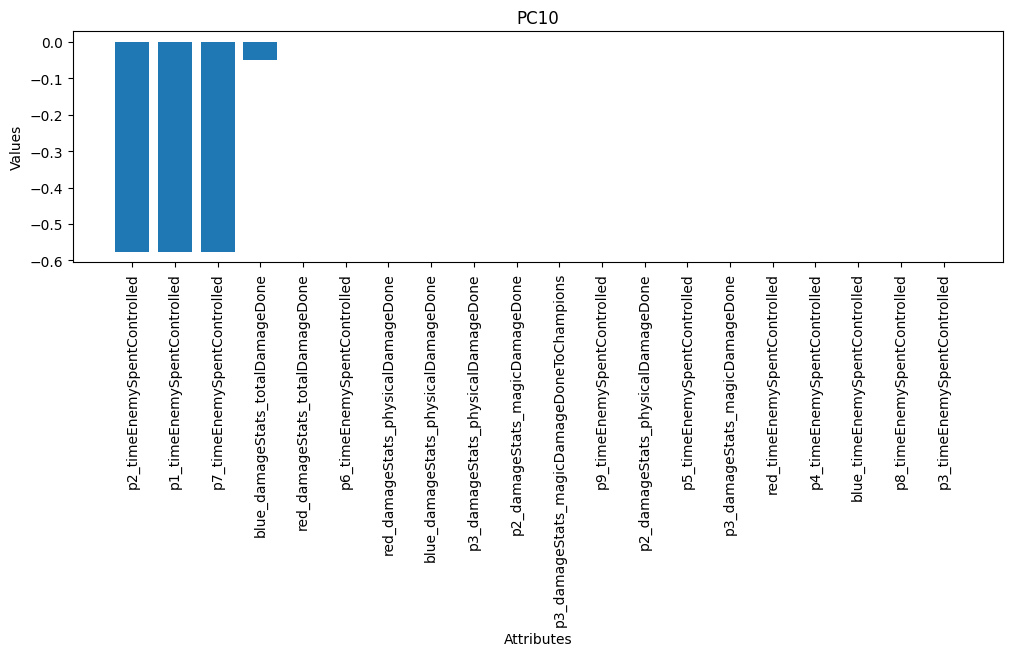

In [23]:
import numpy as np
F = 10

for i in range(10):
    pc = pca.components_[i]
    sorted_indices = np.argsort(pc)
    important_indices = list(sorted_indices[:F]) + list(sorted_indices[-F:])
    sorted_pc = pc[important_indices]
    print(sorted_pc)
    sorted_attributes = [cols_list[i] for i in important_indices]

    plt.figure(figsize=(12, 3))
    plt.bar(sorted_attributes, sorted_pc1)
    plt.xlabel('Attributes')
    plt.ylabel('Values')
    plt.title(f'PC{i+1}')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = [
    LogisticRegression(random_state=42, n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    HistGradientBoostingClassifier(random_state=42),
]

def evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"   Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}\n")


def test_timestamp(timestamp):
    X, y, name = timestamp
    print("Timestamp at {} percent\n".format(name))
    for model in models:
        evaluate_model(model, X, y)

In [38]:
def split_to_ts(data_cleaned):
    timestamps_starting = data_cleaned[data_cleaned["timeStamp"] == 0]
    timestamps_20p = data_cleaned.loc[
        data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
            lambda x: (x - 0.2).abs().idxmin()
        )
    ]
    timestamps_40p = data_cleaned.loc[
        data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
            lambda x: (x - 0.4).abs().idxmin()
        )
    ]
    timestamps_60p = data_cleaned.loc[
        data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
            lambda x: (x - 0.6).abs().idxmin()
        )
    ]
    timestamps_80p = data_cleaned.loc[
        data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
            lambda x: (x - 0.8).abs().idxmin()
        )
    ]
    timestamps_100p = data_cleaned.loc[
        data_cleaned.groupby("matchId")["percentTimeStamp"].apply(
            lambda x: (x - 1.0).abs().idxmin()
        )
    ]
    others = ['matchId', 'percentTimeStamp', 'timeStamp']

    timestamps = []
    X_0 = timestamps_starting.drop(columns=["first_win"] + others)
    y_0 = timestamps_starting["first_win"]
    timestamps.append((X_0, y_0, "0"))

    X_20 = timestamps_20p.drop(columns=["first_win"] + others)
    y_20 = timestamps_20p["first_win"]
    timestamps.append((X_20, y_20, "20"))

    X_40 = timestamps_40p.drop(columns=["first_win"] + others)
    y_40 = timestamps_40p["first_win"]
    timestamps.append((X_40, y_40, "40"))

    X_60 = timestamps_60p.drop(columns=["first_win"] + others)
    y_60 = timestamps_60p["first_win"]
    timestamps.append((X_60, y_60, "60"))

    X_80 = timestamps_80p.drop(columns=["first_win"] + others)
    y_80 = timestamps_80p["first_win"]
    timestamps.append((X_80, y_80, "80"))

    X_100 = timestamps_100p.drop(columns=["first_win"]+ others)
    y_100 = timestamps_100p["first_win"]
    timestamps.append((X_100, y_100, "100"))
    
    return timestamps

In [37]:
PCA_N = 200
pca_data_cleaned_df = pd.DataFrame(data_cleaned_pca[:, :PCA_N])
data_cleaned = pd.concat([pca_data_cleaned_df, ts_and_id_columns], axis=1)
data_cleaned.columns = data_cleaned.columns.astype(str)
data_cleaned

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,matchId,percentTimeStamp,timeStamp,first_win
0,-1.263081e+09,-1.239399e+09,-1.091270e+06,-4.039312e+02,-44150.777073,89103.546837,6624.295384,-2.867026e+04,5624.973679,8458.593721,...,-56.227464,5.260343,-13.766229,10.533302,22.207218,-3.338195,EUW1_6882416210,0.000000,0,False
1,-1.136159e+09,-1.244488e+09,-1.085146e+06,-6.841669e+02,-109779.688780,120181.060665,5787.983987,-1.972493e+04,6293.868343,8605.418365,...,-52.739219,2.481548,-5.602440,-4.543252,5.754990,-3.010699,EUW1_6881092720,0.000000,0,False
2,-9.629680e+08,-1.251552e+09,-1.100736e+06,6.830140e+02,24049.624024,55991.738446,7779.751380,-3.880205e+04,4817.389332,7681.413672,...,-60.469068,14.754147,-0.439844,-8.768442,15.294129,2.975694,EUW1_6879405717,0.000000,0,False
3,-9.580680e+08,-1.251783e+09,-1.079128e+06,-8.909854e+02,-177550.854683,152150.183130,4934.722672,-1.063847e+04,6943.108523,8744.785766,...,-43.017448,6.704319,-2.602976,-9.620547,11.746005,-0.873902,EUW1_6879389461,0.000000,0,True
4,-9.542779e+08,-1.251957e+09,-1.091791e+06,4.101162e+01,-59937.874167,96053.310658,6617.637476,-2.706192e+04,5705.068282,8116.384022,...,-47.727809,9.925488,-5.943698,-15.846109,21.349671,1.977095,EUW1_6879371828,0.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145297,-1.073036e+09,4.132758e+09,1.719458e+06,-8.563766e+05,-211952.002677,-455610.629383,254418.499823,-2.043018e+03,-277506.030079,166836.416786,...,-11.232406,57.505757,-49.108473,-98.810087,-128.050299,-19.046346,TR1_1507514988,1.000000,34,True
145298,-1.125617e+09,4.135368e+09,2.243789e+06,6.974090e+05,66503.087108,-215334.831039,10928.559119,1.247053e+05,-190763.417660,47521.438764,...,149.464050,-20.870303,204.068251,-68.066089,-6.083201,-53.109974,TR1_1507562624,1.000000,32,True
145299,-1.121201e+09,4.135144e+09,1.743785e+06,-1.691582e+06,508056.865395,-363581.611865,981530.823044,1.206587e+06,458443.241315,-336042.424090,...,-42.529965,-22.073954,38.652934,-36.448025,26.359585,151.906639,TR1_1507563448,0.980684,22,True
145300,-1.111144e+09,4.134635e+09,8.596139e+05,1.491200e+05,31986.446675,-313844.256046,-271106.167287,-2.847986e+05,171355.134876,224249.321484,...,-107.033982,20.157722,45.083541,5.603961,-60.388546,-25.905412,TR1_1507564108,1.000000,28,True


In [39]:
timestamps = split_to_ts(data_cleaned)

In [40]:
for i in range(6):
    print(f"!!! {PCA_N} PCA FEATURES !!!")
    test_timestamp(timestamps[i])
    print("\n========================================================\n")

!!! 200 PCA FEATURES !!!
Timestamp at 0 percent

   Model: LogisticRegression
Accuracy: 0.5098

   Model: DecisionTreeClassifier
Accuracy: 0.5011

   Model: RandomForestClassifier
Accuracy: 0.5120

   Model: HistGradientBoostingClassifier
Accuracy: 0.5076



!!! 200 PCA FEATURES !!!
Timestamp at 20 percent

   Model: LogisticRegression
Accuracy: 0.5011

   Model: DecisionTreeClassifier
Accuracy: 0.5317

   Model: RandomForestClassifier
Accuracy: 0.5951

   Model: HistGradientBoostingClassifier
Accuracy: 0.6023



!!! 200 PCA FEATURES !!!
Timestamp at 40 percent

   Model: LogisticRegression
Accuracy: 0.5329

   Model: DecisionTreeClassifier
Accuracy: 0.5762

   Model: RandomForestClassifier
Accuracy: 0.6612

   Model: HistGradientBoostingClassifier
Accuracy: 0.6758



!!! 200 PCA FEATURES !!!
Timestamp at 60 percent

   Model: LogisticRegression
Accuracy: 0.6879

   Model: DecisionTreeClassifier
Accuracy: 0.6363

   Model: RandomForestClassifier
Accuracy: 0.7117

   Model: HistGradient

In [41]:
PCA_N = 500
pca_data_cleaned_df = pd.DataFrame(data_cleaned_pca[:, :PCA_N])
data_cleaned = pd.concat([pca_data_cleaned_df, ts_and_id_columns], axis=1)
data_cleaned.columns = data_cleaned.columns.astype(str)
print(data_cleaned.shape)
timestamps = split_to_ts(data_cleaned)

for i in range(6):
    print(f"!!! {PCA_N} PCA FEATURES !!!")
    test_timestamp(timestamps[i])
    print("\n========================================================\n")

(145302, 504)
!!! 500 PCA FEATURES !!!
Timestamp at 0 percent

   Model: LogisticRegression
Accuracy: 0.5098

   Model: DecisionTreeClassifier
Accuracy: 0.5067

   Model: RandomForestClassifier
Accuracy: 0.5128

   Model: HistGradientBoostingClassifier
Accuracy: 0.5017



!!! 500 PCA FEATURES !!!
Timestamp at 20 percent

   Model: LogisticRegression
Accuracy: 0.5011

   Model: DecisionTreeClassifier
Accuracy: 0.5356

   Model: RandomForestClassifier
Accuracy: 0.5837

   Model: HistGradientBoostingClassifier
Accuracy: 0.6102



!!! 500 PCA FEATURES !!!
Timestamp at 40 percent

   Model: LogisticRegression
Accuracy: 0.5329

   Model: DecisionTreeClassifier
Accuracy: 0.5692

   Model: RandomForestClassifier
Accuracy: 0.6598

   Model: HistGradientBoostingClassifier
Accuracy: 0.6799



!!! 500 PCA FEATURES !!!
Timestamp at 60 percent

   Model: LogisticRegression
Accuracy: 0.6880

   Model: DecisionTreeClassifier
Accuracy: 0.6283

   Model: RandomForestClassifier
Accuracy: 0.7118

   Model

In [43]:
PCA_N = 50
pca_data_cleaned_df = pd.DataFrame(data_cleaned_pca[:, :PCA_N])
data_cleaned = pd.concat([pca_data_cleaned_df, ts_and_id_columns], axis=1)
data_cleaned.columns = data_cleaned.columns.astype(str)
timestamps = split_to_ts(data_cleaned)

for i in range(6):
    print(f"!!! {PCA_N} PCA FEATURES !!!")
    test_timestamp(timestamps[i])
    print("\n========================================================\n")

!!! 50 PCA FEATURES !!!
Timestamp at 0 percent

   Model: LogisticRegression
Accuracy: 0.5098

   Model: DecisionTreeClassifier
Accuracy: 0.4960

   Model: RandomForestClassifier
Accuracy: 0.4937

   Model: HistGradientBoostingClassifier
Accuracy: 0.5092



!!! 50 PCA FEATURES !!!
Timestamp at 20 percent

   Model: LogisticRegression
Accuracy: 0.5011

   Model: DecisionTreeClassifier
Accuracy: 0.5282

   Model: RandomForestClassifier
Accuracy: 0.5709

   Model: HistGradientBoostingClassifier
Accuracy: 0.5786



!!! 50 PCA FEATURES !!!
Timestamp at 40 percent

   Model: LogisticRegression
Accuracy: 0.5328

   Model: DecisionTreeClassifier
Accuracy: 0.5710

   Model: RandomForestClassifier
Accuracy: 0.6276

   Model: HistGradientBoostingClassifier
Accuracy: 0.6455



!!! 50 PCA FEATURES !!!
Timestamp at 60 percent

   Model: LogisticRegression
Accuracy: 0.6887

   Model: DecisionTreeClassifier
Accuracy: 0.6360

   Model: RandomForestClassifier
Accuracy: 0.7047

   Model: HistGradientBoos